# Learning Curve (Loss graph)를 보고 해석하는 방법
 - 모델의 발전방향은?
 - 과대적합 및 과소적합을 파악하는 방법은?
   - Validation Learning Curve를 함께 그려 Training and Validation Learning Curve를 그려보자
   
### Signal Vs Noise
 - signal :모델의 일반화 성능
 - noise :일반화성능이 아닌, train data에서만 true인 데이터로, 현실세계와는 동떨어진 데이터
   - signal을 학습하면 train과 validation graph 모두 감소하지만, noise를 학습 시 train만 감소하고, validation은 증가 
   
### Noise vs Signal에서 Signal이 더 이점이 있으면, Validation Graph는 감소, Noise가 더 이점이 있으면 Validation Graph는 증가!
   - 이것이 생기는 포인트가 바로 Overfitting Point(너무 많은 Noise까지 학습한 것)
   - cf) Underfitting: Too much Noise or Not enough Signal

### 이런 Graph 개형도 Overfitting의 가능성이 있다.
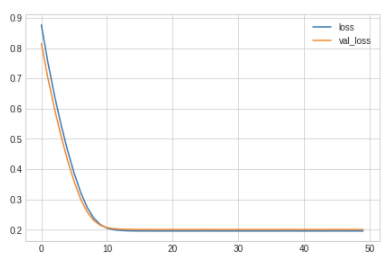

# Capacity: 모델의 크기
 - Wider: 뉴런수를 많이
   - 학습을 더욱 쉽게, 더 많은 선형관계를 지님
 - Depper: Layer를 많이
   - 비선형적인 것을 더욱 학습

In [5]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

# Early Stopping
 - 모델이 Noise를 더 학습하기 전에 Stop. 이를 Validation Loss로 파악!
 - 이를 통해 모델이 덜 학습하거나, noise까지 지나치게 학습하는 경우를 방지할 수 있다.
 - Early Stopping을 구현하는 경우, Epoch를 충분히 크게해도 상관없다!

In [7]:
'''
질문: restore_best_weights 파라미터
'''

'\n질문: restore_best_weights 파라미터\n'

### 파라미터
 - min_delta: 0.001 만큼의 loss를 학습해야 학습으로 인정한다
 - restore_best_weights=True: 학습간 가장 최적의 weight를 불러와 학습? (현재 epoch에서 학습이 완료된 것은 폐기한다 인가?)

In [6]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping( 
    min_delta = 0.001,
    patience=20,
    restore_best_weights=True)

# 전체 구현

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [2]:
'''
질문: groupshuffle??
ex) 
X : 독립변수 #@$%^%
Y : 비만여부 0, 0, 1, 0, 0
그룹: 우울증여부: O, X, O O O , X... 면
우울증 여부를 STRATIFIED한다는 것아닌가,,,?
'''

'\n질문: groupshuffle??\nex) \nX : 독립변수 #@$%^%\nY : 비만여부 0, 0, 1, 0, 0\n그룹: 우울증여부: O, X, O O O , X... 면\n우울증 여부를 STRATIFIED한다는 것아닌가,,,?\n'

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('./data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


Epoch 1/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2119 - val_loss: 0.2049
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1962 - val_loss: 0.2013
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1928 - val_loss: 0.2027
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1905 - val_loss: 0.2018
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1883 - val_loss: 0.2008
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1874 - val_loss: 0.1997
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1853 - val_loss: 0.2004
Epoch 8/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1846 - val_loss: 0.1990
Epoch 9/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1839 - val_loss: 0.1998
Epoch 10/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1832 - val_loss: 0.2021
Epoch 11/50
49/49 [

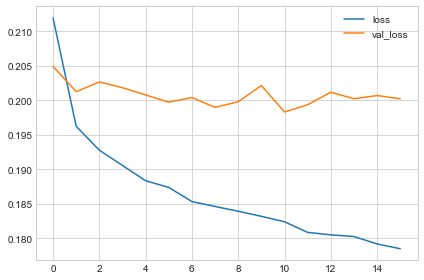

In [13]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

early_stopping = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));